# Data Preparation Notebook

This notebook reads in all .csv data for all ISIC competition from 2016 to 2020 and renames underlying images and consistently renames the target.

All file names and file target (classification) are aggregated for all years and a full data dataframe is saved in .csv format to be used in training.

In [80]:
import cv2
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot
import os
import shutil
import numpy as np

In [8]:
def label_target (row):
    if row[2] == 'benign':
        return 0
    else:
        return 1

In [10]:
all_data_df = pd.DataFrame()

In [25]:
## 2016 Dataframes ##
df_2016_1 = pd.read_csv('2016_1_renamed.csv')
df_2016_1['target'] = df_2016_1.apply(lambda row: label_target(row), axis=1)
df_2016_1['target'] = df_2016_1['target'].astype('float32')
df_2016_1_dist = pd.DataFrame()
df_2016_1_dist[['filename','target']] = df_2016_1[['0','target']]

In [26]:
df_2016_2 = pd.read_csv('2016_2_renamed.csv')
df_2016_2['target'] = df_2016_2['1']
df_2016_2_dist = pd.DataFrame()
df_2016_2_dist[['filename','target']] = df_2016_2[['0','target']]

In [33]:
def label_target_2017 (row):
    if row['melanoma'] > 0.5:
        return 1.0
    else:
        return 0.0

In [35]:
## 2017 Dataframes ##
df_2017_1 = pd.read_csv('2017_1_renamed.csv',header=1)
df_2017_1['target'] = df_2017_1.apply(lambda row: label_target_2017(row), axis=1)
df_2017_1_dist = pd.DataFrame()
df_2017_1_dist[['filename','target']] = df_2017_1[['image_id','target']]

In [36]:
df_2017_2 = pd.read_csv('2017_2_renamed.csv',header=1)
df_2017_2['target'] = df_2017_2.apply(lambda row: label_target_2017(row), axis=1)
df_2017_2_dist = pd.DataFrame()
df_2017_2_dist[['filename','target']] = df_2017_2[['image_id','target']]

In [37]:
df_2017_3 = pd.read_csv('2017_3_renamed.csv',header=1)
df_2017_3['target'] = df_2017_3.apply(lambda row: label_target_2017(row), axis=1)
df_2017_3_dist = pd.DataFrame()
df_2017_3_dist[['filename','target']] = df_2017_3[['image_id','target']]

In [42]:
def label_target_2018 (row):
    if row['MEL'] > 0.5:
        return 1.0
    if row['BCC'] > 0.5:
        return 1.0
    if row['AKIEC'] > 0.5:
        return 1.0
    
    return 0.0

In [46]:
## 2018 Dataframes ##
df_2018_1 = pd.read_csv('2018_1_renamed.csv',header=1)
df_2018_1['target'] = df_2018_1.apply(lambda row: label_target_2018(row), axis=1)
df_2018_1_dist = pd.DataFrame()
df_2018_1_dist[['filename','target']] = df_2018_1[['image','target']]


In [47]:
df_2018_2 = pd.read_csv('2018_2_renamed.csv',header=1)
df_2018_2['target'] = df_2018_2.apply(lambda row: label_target_2018(row), axis=1)
df_2018_2_dist = pd.DataFrame()
df_2018_2_dist[['filename','target']] = df_2018_2[['image','target']]


,filename,target
0,ISIC_0034321_2018_2_28,0.0
1,ISIC_0034322_2018_2_100,0.0
2,ISIC_0034323_2018_2_12,1.0
3,ISIC_0034324_2018_2_59,0.0
4,ISIC_0034325_2018_2_88,0.0
...,...,...
188,ISIC_0034519_2018_2_116,0.0
189,ISIC_0034520_2018_2_104,0.0
190,ISIC_0034521_2018_2_178,0.0
191,ISIC_0034522_2018_2_118,0.0


In [52]:
def label_target_2019 (row):
    if row['MEL'] > 0.5:
        return 1.0
    if row['BCC'] > 0.5:
        return 1.0
    if row['AK'] > 0.5:
        return 1.0
    if row['SCC'] > 0.5:
        return 1.0
    
    return 0.0

In [56]:
df_2019_1 = pd.read_csv('2019_1_renamed.csv',header=1)
df_2019_1['target'] = df_2019_1.apply(lambda row: label_target_2019(row), axis=1)
df_2019_1_dist = pd.DataFrame()
df_2019_1_dist[['filename','target']] = df_2019_1[['image','target']]

In [57]:
def label_target_2020 (row):
    if row['benign_malignant'] == 'benign':
        return 0.0
    return 1.0

In [59]:
df_2020_1 = pd.read_csv('2020_1_renamed.csv',header=1)
df_2020_1
df_2020_1['target'] = df_2020_1.apply(lambda row: label_target_2020(row), axis=1)
df_2020_1_dist = pd.DataFrame()
df_2020_1_dist[['filename','target']] = df_2020_1[['image_name','target']]


In [133]:
all_data_df = pd.concat([df_2020_1_dist,df_2019_1_dist,df_2018_1_dist,df_2018_2_dist,df_2017_1_dist,
                         df_2017_2_dist, df_2017_3_dist])
all_data_df

,filename,target
0,ISIC_2637011_2020_1_31256,0.0
1,ISIC_0015719_2020_1_2963,0.0
2,ISIC_0052212_2020_1_14821,0.0
3,ISIC_0068279_2020_1_23495,0.0
4,ISIC_0074268_2020_1_30557,0.0
...,...,...
145,ISIC_0015443_2017_3_145,0.0
146,ISIC_0015445_2017_3_146,0.0
147,ISIC_0015483_2017_3_147,0.0
148,ISIC_0015496_2017_3_148,0.0


In [134]:
## confirm all images exist ##
def check_filename (row):
    name = row['filename']
    name = 'FullData/' + name + '.jpg'
    if name in files:
        return 1
    else:
        return 0
    
global files
files = glob.glob('FullData/*')

In [135]:
all_data_df.reset_index(inplace=True)
result = all_data_df.apply(lambda row: check_filename(row), axis=1)

In [136]:
result = result.to_numpy()
np.where(result == 0)

(array([33142, 33143, 33144, ..., 36026, 36027, 36028]),)

In [137]:
missing = all_data_df.iloc[np.where(result == 0)]
missing.count()

index       2074
filename    2074
target      2074
dtype: int64

In [138]:
all_data_df.count()

index       71415
filename    71415
target      71415
dtype: int64

### Check distribution of malignant vs benign

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

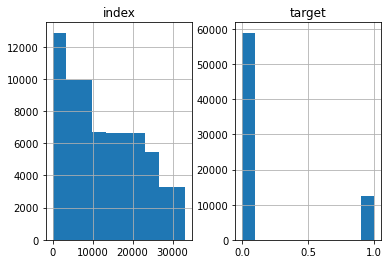

In [139]:
all_data_df.hist()

In [140]:
all_data_df.iloc[np.where(result == 0)].count()

index       2074
filename    2074
target      2074
dtype: int64

In [141]:
indicies = all_data_df.iloc[np.where(result == 0)].index.tolist()
all_data_df.drop(index=indicies,inplace=True)
all_data_df.count()

index       69341
filename    69341
target      69341
dtype: int64

### Store the resolution of all images in the dataframe

In [153]:
def get_width (row):
    name = row['filename']
    name = 'FullData/' + name + '.jpg'
    img = cv2.imread(name,0)
    height, width = img.shape[:2]
    return width

def get_height (row):
    name = row['filename']
    name = 'FullData/' + name + '.jpg'
    
    img = cv2.imread(name,0)
    height, width = img.shape[:2]
    return height


global files
files = glob.glob('FullData/*')

In [154]:
all_data_df['width'] = all_data_df.apply(lambda row: get_width(row), axis=1)
all_data_df['height'] = all_data_df.apply(lambda row: get_height(row), axis=1)

In [158]:
all_data_df.describe()

,index,target,width,height
count,69341.000000,69341.000000,69341.000000,69341.000000
mean,13242.112430,0.174053,989.350918,901.019671
std,9070.255164,0.379158,627.773981,444.978754
min,0.000000,0.000000,576.000000,450.000000
25%,5488.000000,0.000000,600.000000,450.000000
50%,11893.000000,0.000000,1024.000000,1024.000000
75%,20560.000000,0.000000,1024.000000,1024.000000
max,33125.000000,1.000000,6748.000000,4499.000000


In [156]:
all_data_df.to_csv('FinalTrain.csv',index=False)

In [169]:
high_resolution = all_data_df[all_data_df['height'] > 1000]
small = small[small['width'] > 1000]
small.describe()

,index,target,width,height
count,47557.000000,47557.000000,47557.000000,47557.000000
mean,16564.796644,0.163803,1155.280653,1097.984944
std,8901.827742,0.370101,694.508424,403.055413
min,0.000000,0.000000,1024.000000,1016.000000
25%,9871.000000,0.000000,1024.000000,1024.000000
50%,17339.000000,0.000000,1024.000000,1024.000000
75%,23283.000000,0.000000,1024.000000,1024.000000
max,33125.000000,1.000000,6748.000000,4499.000000


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'target'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>]], dtype=object)

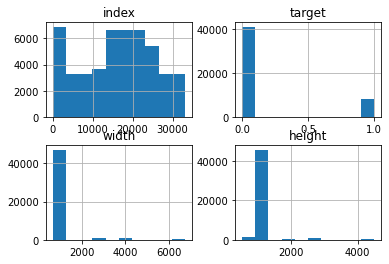

In [163]:
small.hist()

### Save the full dataframe for training

In [1]:
import pandas as pd

df =pd.read_csv('FinalTrain.csv')
df['target'].sum()

12069.0